## Day 1

In [1]:
with open("input01.txt") as file:
    depths = [int(d) for d in file]


In [2]:
from itertools import zip_longest

sum([previous < current for previous, current in zip(depths, depths[1:])])


1624

In [3]:
cum_depths = [sum(window) for window in zip(depths, depths[1:], depths[2:])]
sum([previous < current for previous, current in zip(cum_depths, cum_depths[1:])])


1653

## Day 2

In [4]:
with open("input02.txt") as file:
    directions = [tuple(direction.split(" ")) for direction in file]


In [5]:
from collections import defaultdict

d = defaultdict(int)

for direction, distance in directions:
    d[direction] += int(distance)

vertical = d["down"] - d["up"]
vertical * d["forward"]


1524750

In [6]:
aim = 0
horizontal = 0
depth = 0

for direction, distance in directions:
    distance = int(distance)

    if direction == "up":
        aim -= distance
    if direction == "down":
        aim += distance
    if direction == "forward":
        horizontal += distance
        depth += aim * distance

horizontal * depth


1592426537

## Day 3

In [7]:
from collections import Counter

with open("input03.txt") as file:
    numbers = file.readlines()

matrix = list(zip(*[[n for n in number.replace("\n", "")] for number in numbers]))

counters = [Counter(digits) for digits in matrix]
gamma_rate = int("".join([counter.most_common()[0][0] for counter in counters]), base=2)
epsilon_rate = int(
    "".join([counter.most_common()[-1][0] for counter in counters]), base=2
)
gamma_rate * epsilon_rate


1307354

In [8]:
from collections import Counter
from dataclasses import dataclass


@dataclass(frozen=True)
class Metric:
    index: int
    tie_breaker: str


oxygen = Metric(0, "1")
co2 = Metric(1, "0")


with open("input03.txt") as file:
    numbers = [line.replace("\n", "") for line in file]


def find_rating(numbers, metric: Metric, current_bit=0):
    if len(numbers) == 1:

        return int(numbers[0], base=2)

    matrix = list(zip(*[[n for n in number] for number in numbers]))
    sorted_counts = Counter(matrix[current_bit]).most_common()
    most_common_digit, count = sorted_counts[metric.index]

    if sorted_counts[abs(metric.index - 1)][1] == count:
        most_common_digit = metric.tie_breaker

    return find_rating(
        list(filter(lambda n: n[current_bit] == most_common_digit, numbers)),
        metric,
        current_bit + 1,
    )


find_rating(numbers, oxygen) * find_rating(numbers, co2)


482500

## Day 4

In [9]:
import numpy as np
from numpy import ma

with open("input04.txt") as file:
    data = [line.replace("\n", "") for line in file]

bingo_boards = [data[2:][i * 6 : i * 6 + 5] for i in range(int((len(data) - 1) / 6))]
bingo_boards = [
    [list(filter(lambda x: x != "", b.split(" "))) for b in board]
    for board in bingo_boards
]

bingo_boards = [ma.array(board).astype(int) for board in bingo_boards]

bingo_numbers = [int(number) for number in data[0].split(",")]


In [10]:
def play_bingo(bingo_numbers, bingo_boards) -> int:
    for number in bingo_numbers:
        for board in bingo_boards:
            board.mask |= board == number  # evaluate number

            column_bingo = np.any(np.all(board.mask, axis=0))  # check columns for bingo
            row_bingo = np.any(np.all(board.mask, axis=1))  # check rows for bingo

            if column_bingo or row_bingo:
                return board.sum() * number


# reset boards
for board in bingo_boards:
    board.mask = np.zeros(board.shape)

play_bingo(bingo_numbers, bingo_boards)


71708

In [11]:
from dataclasses import dataclass
from itertools import count


@dataclass
class BingoBoard:
    array: ma.array
    rank: int = None
    number: int = None


def play_bingo_last(bingo_numbers, bingo_boards) -> int:
    ranks = count(1)
    bingo_board_instances = [BingoBoard(board) for board in bingo_boards]

    for number in bingo_numbers:
        for board in bingo_board_instances:
            if not board.rank:
                board.array.mask |= board.array == number  # evaluate number

                column_bingo = np.any(
                    np.all(board.array.mask, axis=0)
                )  # check columns for bingo
                row_bingo = np.any(
                    np.all(board.array.mask, axis=1)
                )  # check rows for bingo

                if column_bingo or row_bingo:
                    board.rank = next(ranks)
                    board.number = number

    last_bingo = sorted(
        bingo_board_instances, key=lambda board: board.rank, reverse=True
    )[0]
    print(last_bingo)
    return last_bingo.array.sum() * last_bingo.number


# reset boards
for board in bingo_boards:
    board.mask = np.zeros(board.shape)

play_bingo_last(bingo_numbers, bingo_boards)


BingoBoard(array=masked_array(
  data=[[--, --, --, 42, --],
        [--, --, 98, --, --],
        [--, --, --, 20, --],
        [56, --, --, --, 81],
        [--, --, --, --, 61]],
  mask=[[ True,  True,  True, False,  True],
        [ True,  True, False,  True,  True],
        [ True,  True,  True, False,  True],
        [False,  True,  True,  True, False],
        [ True,  True,  True,  True, False]],
  fill_value=999999), rank=100, number=97)


34726

## Day 5

In [12]:
with open("input05.txt") as file:
    coordinates = [
        [tuple(xy.split(",")) for xy in line.replace("\n", "").split(" -> ")]
        for line in file
    ]


In [13]:
from shapely.geometry import LineString

lines = [
    LineString([[int(s) for s in start], [int(e) for e in end]])
    for start, end in coordinates
]


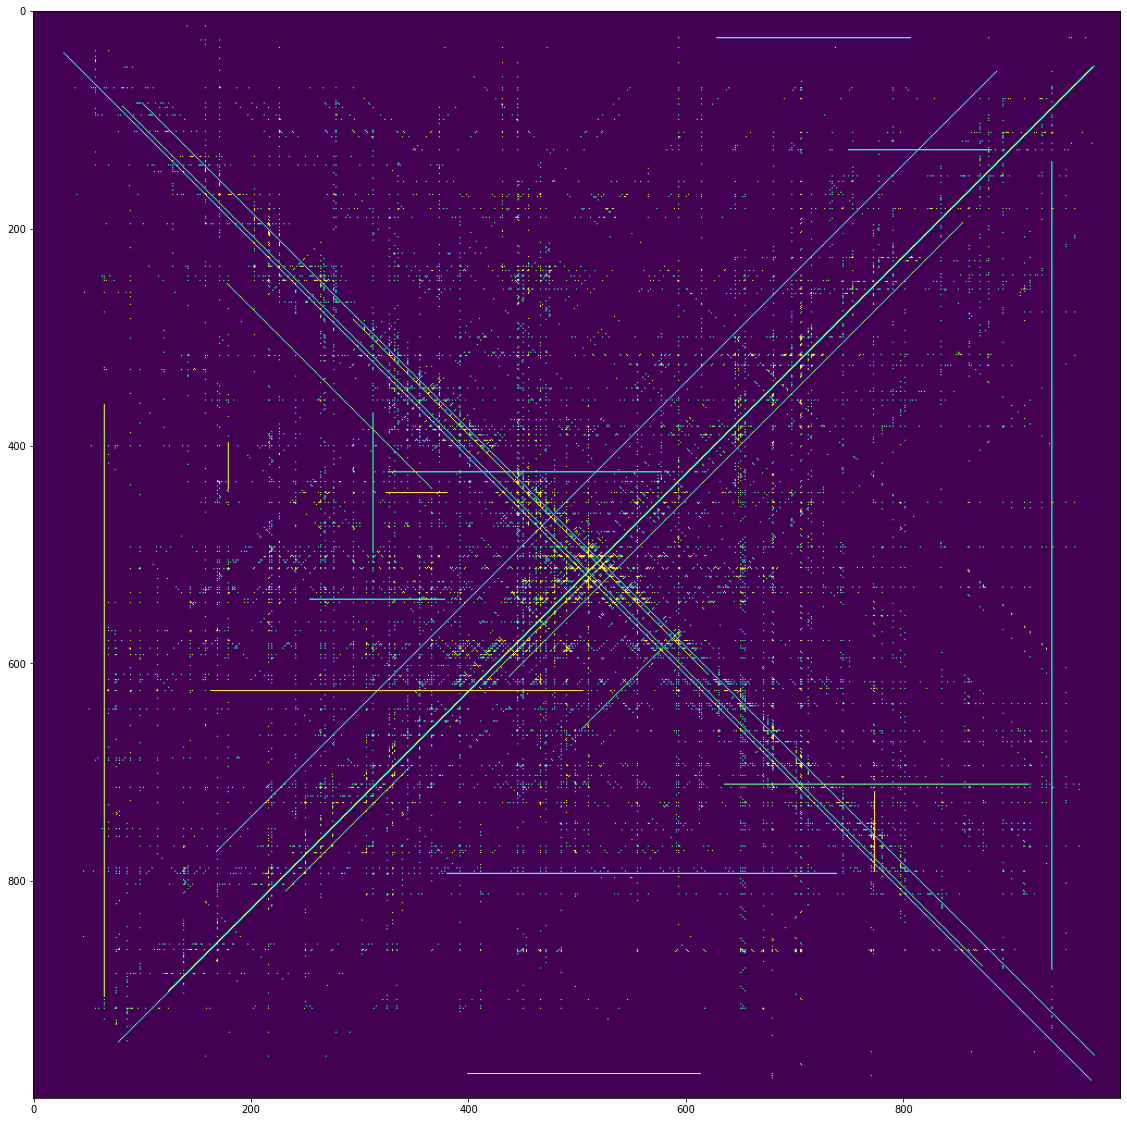

In [14]:
import matplotlib.pyplot as plt
from rasterio.enums import MergeAlg
from rasterio.features import rasterize

orthogonal_lines = list(
    filter(
        lambda line: (start := line.coords[0])[0] == (end := line.coords[1])[0]
        or start[1] == end[1],
        lines,
    )
)

# use orthogonal_lines here for first part of day 5
lines_raster = rasterize(lines, (1000, 1000), merge_alg=MergeAlg.add, default_value=1)
dangerous_points = lines_raster >= 2

fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(dangerous_points)


In [15]:
dangerous_points.sum()


22335

## Day 6

In [16]:
with open("input06.txt") as file:
    timers = [int(timer) for timer in file.read().split(",")]


### Pt. 1 object-oriented

In [17]:
from dataclasses import dataclass
from copy import deepcopy
from typing import ClassVar


@dataclass
class Lanternfish:
    population: ClassVar[list] = list()
    timer: int

    def __post_init__(self):
        Lanternfish.population.append(self)

    def _decrement(self):
        self.timer -= 1

    def grow(self):
        if self.timer == 0:
            self.timer = 6
            Lanternfish(8)  # new lanternfish is born
        else:
            self._decrement()


# init lanternfish
for timer in timers:
    Lanternfish(timer)

for i in range(80):
    for lanternfish in Lanternfish.population.copy():
        lanternfish.grow()

len(Lanternfish.population)


380758

### Pt. 1 numpy

In [18]:
import numpy as np

population = np.array(timers)

for i in range(80):
    n_matures = sum(population == 0)
    population = np.where(population == 0, 6, population - 1)
    population = np.concatenate((population, np.ones(n_matures, dtype=int) * 8))

print(len(population))


380758


### Pt. 1 generators

In [19]:
from itertools import chain, islice

N_DAYS = 80

first_iteration = list(
    chain.from_iterable(islice(range(N_DAYS), i, None, 7) for i in timers)
)


def grow(iteration, n_population: int):
    if len(iteration) == 0:
        return n_population
    n_population += len(iteration)
    next_iteration = list(
        chain.from_iterable(islice(range(N_DAYS), i + 9, None, 7) for i in iteration)
    )
    return grow(next_iteration, n_population)


grow(first_iteration, len(timers))


380758

### Pt. 2

This solution was implemented after having read hints on reddit

In [20]:
from collections import Counter
from dataclasses import dataclass


@dataclass
class Bucket:
    timer: int
    n_fish: int


buckets = Counter(timers)
for i in range(256):
    new_day = dict([(timer - 1, n_fish) for timer, n_fish in buckets.items()])
    buckets = Counter(new_day)
    buckets.update({6: new_day.get(-1, 0), 8: new_day.get(-1, 0)})
    del buckets[-1]

sum(buckets.values())


1710623015163

## Day 7

In [21]:
from statistics import median

examples = [16, 1, 2, 0, 4, 2, 7, 1, 2, 14]

with open("input07.txt") as file:
    data = [int(d) for d in file.read().split(",")]


### Pt. 1

In [22]:
med = median(data)
sum([abs(d - med) for d in data])


339321.0

### Pt. 2

The brute-force approach ended in acceptable time (~12s), but this is much faster (0.3s)

In [23]:
def find_min_fuel(data, start, stop, step):
    fuel_consumptions = {}

    for i in range(start, stop + step, step):  # add step to stop to be on the save side
        fuel = [sum(range(1, abs(d - i) + 1)) for d in data]
        fuel_consumptions[sum(fuel)] = i

    minimum = min(list(fuel_consumptions.keys()))

    if step == 1:
        return minimum

    return find_min_fuel(
        data,
        fuel_consumptions[minimum] - step,
        fuel_consumptions[minimum] + step,
        int(step / 10),
    )


find_min_fuel(data, min(data), max(data), 100) == 95476244


True

## Day 8

_Pt. 1 got lost by mistake._

In [24]:
from enum import Enum, auto
from itertools import combinations
from typing import Dict, List, NewType, Set

SignalPattern = NewType("SignalPattern", set)
Signal = NewType("Signal", str)

with open("input08.txt") as file:
    data = [
        [
            [SignalPattern(frozenset(signal)) for signal in io.split(" ")]
            for io in line.rstrip().split(" | ")
        ]
        for line in file
    ]


In [25]:
class Segment(Enum):
    TOP = auto()
    UPPER_LEFT = auto()
    UPPER_RIGHT = auto()
    MIDDLE = auto()
    LOWER_LEFT = auto()
    LOWER_RIGHT = auto()
    BOTTOM = auto()


class Digit(Enum):
    ZERO = {
        Segment.TOP,
        Segment.UPPER_LEFT,
        Segment.UPPER_RIGHT,
        Segment.LOWER_LEFT,
        Segment.LOWER_RIGHT,
        Segment.BOTTOM,
    }
    ONE = {Segment.UPPER_RIGHT, Segment.LOWER_RIGHT}
    TWO = {
        Segment.TOP,
        Segment.UPPER_RIGHT,
        Segment.MIDDLE,
        Segment.LOWER_LEFT,
        Segment.BOTTOM,
    }
    THREE = {
        Segment.TOP,
        Segment.UPPER_RIGHT,
        Segment.MIDDLE,
        Segment.LOWER_RIGHT,
        Segment.BOTTOM,
    }
    FOUR = {
        Segment.UPPER_LEFT,
        Segment.UPPER_RIGHT,
        Segment.MIDDLE,
        Segment.LOWER_RIGHT,
    }
    FIVE = {
        Segment.TOP,
        Segment.UPPER_LEFT,
        Segment.MIDDLE,
        Segment.LOWER_RIGHT,
        Segment.BOTTOM,
    }
    SIX = {
        Segment.TOP,
        Segment.UPPER_LEFT,
        Segment.MIDDLE,
        Segment.LOWER_LEFT,
        Segment.LOWER_RIGHT,
        Segment.BOTTOM,
    }
    SEVEN = {Segment.TOP, Segment.UPPER_RIGHT, Segment.LOWER_RIGHT}
    EIGHT = {segment for segment in Segment}
    NINE = {
        Segment.TOP,
        Segment.UPPER_LEFT,
        Segment.UPPER_RIGHT,
        Segment.MIDDLE,
        Segment.LOWER_RIGHT,
        Segment.BOTTOM,
    }


NUMBER_MAPPING = {
    "ZERO": 0,
    "ONE": 1,
    "TWO": 2,
    "THREE": 3,
    "FOUR": 4,
    "FIVE": 5,
    "SIX": 6,
    "SEVEN": 7,
    "EIGHT": 8,
    "NINE": 9,
}


In [26]:
def decode_signal_patterns(
    signal_pattern_to_possible_digits: Dict[SignalPattern, Set[Digit]],
    signal_pattern_to_digit: Dict[SignalPattern, Digit] = None,
    signal_to_segment: Dict[Signal, Segment] = None,
) -> Dict[SignalPattern, Digit]:
    # Initialize
    if signal_pattern_to_digit is None:
        signal_pattern_to_digit = dict()
    if signal_to_segment is None:
        signal_to_segment = dict()

    signal_pattern_to_digit: Dict[SignalPattern, Digit] = {
        **signal_pattern_to_digit,
        **{
            signal_pattern: digits.pop()
            for signal_pattern, digits in signal_pattern_to_possible_digits.items()
            if len(digits) == 1
        },
    }

    if len(signal_pattern_to_digit) == 10:
        return signal_pattern_to_digit

    # find segments that are unique between two digits
    for signal_pattern_1, signal_pattern_2 in combinations(signal_pattern_to_digit, 2):
        signal_pattern_intersection = signal_pattern_1 ^ signal_pattern_2
        segment_intersection = (
            signal_pattern_to_digit[signal_pattern_1].value
            ^ signal_pattern_to_digit[signal_pattern_2].value
        )

        if len(signal_pattern_intersection) == 1 and len(segment_intersection) == 1:
            signal_to_segment[
                Signal(set(signal_pattern_intersection).pop())
            ] = segment_intersection.pop()

    # reduce possible digits using digits and segments we are sure about
    for signal_pattern in signal_pattern_to_possible_digits:

        # all of these segments must be present in digit corresponding to signal_pattern
        segments_subset = set().union(
            *[
                signal_pattern_to_digit[pattern].value
                for pattern in signal_pattern_to_digit
                if pattern < signal_pattern
            ]
        )

        # remove digits that cannot be represented by segments subset
        signal_pattern_to_possible_digits[signal_pattern] -= {
            digit
            for digit in signal_pattern_to_possible_digits[signal_pattern]
            if not digit.value > segments_subset
        }

        # remove digits that miss some already decoded segments of pattern
        decoded_signals_subset = set(signal_to_segment.keys()) & signal_pattern
        decoded_segments_subset = {
            signal_to_segment[Signal(signal)] for signal in decoded_signals_subset
        }
        signal_pattern_to_possible_digits[signal_pattern] -= {
            digit
            for digit in signal_pattern_to_possible_digits[signal_pattern]
            if not digit.value > decoded_segments_subset
        }

    return decode_signal_patterns(
        signal_pattern_to_possible_digits,
        signal_pattern_to_digit,
        signal_to_segment,
    )


decoded_output_signals = []

for entry in data:
    signal_pattern_to_possible_digits: Dict[SignalPattern, Set[Digit]] = {}

    signal_patterns, output_signals = entry

    for signal_pattern in signal_patterns:
        # first matching by signal_pattern length
        signal_pattern_to_possible_digits[SignalPattern(signal_pattern)] = {
            digit for digit in Digit if len(digit.value) == len(signal_pattern)
        }

    decoded_signal_patterns = decode_signal_patterns(signal_pattern_to_possible_digits)
    decoded_output_signals.append(
        sum(
            digit * factor
            for digit, factor in zip(
                (
                    NUMBER_MAPPING[decoded_signal_patterns[pattern].name]
                    for pattern in output_signals
                ),
                [1000, 100, 10, 1],
            )
        )
    )

sum(decoded_output_signals)


978171

## Day 12

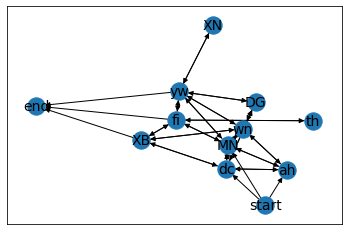

In [27]:
from enum import Enum, auto
from itertools import chain, combinations
from typing import Set, Tuple

import matplotlib.pyplot as plt
import networkx as nx


with open("input09.txt") as file:
    data = [line.rstrip().split("-") for line in file]


G = nx.DiGraph()

nodes = set(chain.from_iterable(data))
G.add_nodes_from(nodes)
edges = data.extend([list(reversed(nodes)) for nodes in data])
edges = list(
    # eliminate impossible directions
    filter(lambda nodes: nodes[0] != "end" and nodes[1] != "start", data)
)
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=77)  # Seed layout for reproducibility
nx.draw_networkx(G, pos=pos, font_size=14)
plt.show()

In [28]:
one_b = ("start", "A", "b", "A")
without_c = one_b + ("b",)
with_c = without_c + ("c",)


def can_be_visited(path, node) -> bool:
    if node.isupper() or node == "end" or node not in path:
        return True

    # check if a single small cave has been visited twice
    small_caves = [node for node in path + (node,) if node.islower()]
    return len(small_caves) - 1 <= len(set(small_caves))


assert can_be_visited(one_b, "A") == True
assert can_be_visited(one_b, "b") == True
assert can_be_visited(one_b, "c") == True
assert can_be_visited(one_b, "end") == True
assert can_be_visited(without_c, "c") == True
assert can_be_visited(without_c, "end") == True
assert can_be_visited(without_c, "b") == False
assert can_be_visited(with_c, "c") == False


In [29]:
def traverse_graph(
    G: nx.Graph,
    paths: Set[Tuple[str, ...]] = None,
    prev_new_paths: Set[Tuple[str, ...]] = None,
) -> int:
    if paths is None:
        paths = paths = {("start",)}

    new_paths = set()
    for path in prev_new_paths or paths:
        for node in G.successors(path[-1]):
            if  can_be_visited(path, node):
                new_paths.add(path + (node,))

    if len(new_paths) == 0:
        paths = set(filter(lambda p: p[-1] == "end", paths))
        return len(paths)

    paths |= new_paths
    return traverse_graph(G, paths, new_paths)


traverse_graph(G)


122134